<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/AbbVie_Inc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install  yfinance

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

In [7]:
ABBV = "ABBV" 

In [8]:
ABBV = yfinance.download(ABBV)
ABBV

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,34.919998,35.400002,34.099998,35.119999,25.368492,13767900
2013-01-03,35.000000,35.000000,34.160000,34.830002,25.159014,16739300
2013-01-04,34.619999,34.889999,34.250000,34.389999,24.841188,21372100
2013-01-07,34.150002,35.450001,34.150002,34.459999,24.891750,17897100
2013-01-08,34.290001,34.639999,33.360001,33.709999,24.350002,17863300
...,...,...,...,...,...,...
2020-09-21,89.139999,89.430000,87.169998,89.089996,89.089996,7328300
2020-09-22,88.900002,88.949997,87.930000,88.599998,88.599998,5306100
2020-09-23,89.000000,89.269997,87.120003,87.139999,87.139999,6253000


In [9]:
ABBV.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,34.919998,35.400002,34.099998,35.119999,25.368492,13767900
2013-01-03,35.000000,35.000000,34.160000,34.830002,25.159014,16739300
2013-01-04,34.619999,34.889999,34.250000,34.389999,24.841188,21372100
2013-01-07,34.150002,35.450001,34.150002,34.459999,24.891750,17897100
2013-01-08,34.290001,34.639999,33.360001,33.709999,24.350002,17863300


In [10]:
ABBV.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-21,89.139999,89.430000,87.169998,89.089996,89.089996,7328300
2020-09-22,88.900002,88.949997,87.930000,88.599998,88.599998,5306100
2020-09-23,89.000000,89.269997,87.120003,87.139999,87.139999,6253000
2020-09-24,87.000000,87.000000,85.320000,85.910004,85.910004,9980800
2020-09-25,86.000000,86.860001,85.459999,86.230003,86.230003,9932400


In [11]:
ABBV.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1.948000e+03
mean,69.537947,70.320288,68.734661,69.550513,59.537185,8.034644e+06
std,18.366480,18.593893,18.112930,18.341036,19.846134,5.615470e+06
min,33.590000,33.900002,33.330002,33.709999,24.350002,1.612800e+06
25%,56.052500,56.700001,55.315000,56.040001,44.452499,5.086075e+06
50%,65.514999,66.135002,65.024998,65.615002,53.400785,6.795650e+06
75%,85.709997,86.977501,84.517498,85.637499,78.596413,9.459575e+06
max,121.500000,125.860001,119.040001,123.209999,106.998779,1.227402e+08


In [12]:
ABBV.info

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  34.919998  35.400002  34.099998  35.119999  25.368492  13767900
2013-01-03  35.000000  35.000000  34.160000  34.830002  25.159014  16739300
2013-01-04  34.619999  34.889999  34.250000  34.389999  24.841188  21372100
2013-01-07  34.150002  35.450001  34.150002  34.459999  24.891750  17897100
2013-01-08  34.290001  34.639999  33.360001  33.709999  24.350002  17863300
...               ...        ...        ...        ...        ...       ...
2020-09-21  89.139999  89.430000  87.169998  89.089996  89.089996   7328300
2020-09-22  88.900002  88.949997  87.930000  88.599998  88.599998   5306100
2020-09-23  89.000000  89.269997  87.120003  87.139999  87.139999   6253000
2020-09-24  87.000000  87.000000  85.320000  85.910004  85.910004   9980800
2020-09-25  86.000000  86.860001  85.459999  86.230003  

In [13]:
ABBV.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1948 entries, 2013-01-02 to 2020-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1948 non-null   float64
 1   High       1948 non-null   float64
 2   Low        1948 non-null   float64
 3   Close      1948 non-null   float64
 4   Adj Close  1948 non-null   float64
 5   Volume     1948 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 106.5 KB


In [14]:
import sqlite3

In [15]:
conn = sqlite3.connect("ABBV.db")
c = conn.cursor()

In [16]:
conn = sqlite3.connect("ABBV.db")
c = conn.cursor()

In [17]:
ABBV.to_sql("ABBV", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [18]:
#See data
c.execute("""SELECT * FROM ABBV""")
rows = c.fetchall()
rows

[('2013-01-02 00:00:00',
  34.91999816894531,
  35.400001525878906,
  34.099998474121094,
  35.119998931884766,
  25.368492126464844,
  13767900),
 ('2013-01-03 00:00:00',
  35.0,
  35.0,
  34.15999984741211,
  34.83000183105469,
  25.159013748168945,
  16739300),
 ('2013-01-04 00:00:00',
  34.619998931884766,
  34.88999938964844,
  34.25,
  34.38999938964844,
  24.841188430786133,
  21372100),
 ('2013-01-07 00:00:00',
  34.150001525878906,
  35.45000076293945,
  34.150001525878906,
  34.459999084472656,
  24.89175033569336,
  17897100),
 ('2013-01-08 00:00:00',
  34.290000915527344,
  34.63999938964844,
  33.36000061035156,
  33.709999084472656,
  24.35000228881836,
  17863300),
 ('2013-01-09 00:00:00',
  33.61000061035156,
  33.95000076293945,
  33.61000061035156,
  33.900001525878906,
  24.48724365234375,
  18800400),
 ('2013-01-10 00:00:00',
  33.65999984741211,
  34.0,
  33.33000183105469,
  34.0,
  24.55948257446289,
  15658100),
 ('2013-01-11 00:00:00',
  33.59000015258789,
  33

In [19]:
ABBV.to_excel("ABBV.xls")

pd.read_excel("ABBV.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,34.919998,35.400002,34.099998,35.119999,25.368492,13767900
1,2013-01-03,35.000000,35.000000,34.160000,34.830002,25.159014,16739300
2,2013-01-04,34.619999,34.889999,34.250000,34.389999,24.841188,21372100
3,2013-01-07,34.150002,35.450001,34.150002,34.459999,24.891750,17897100
4,2013-01-08,34.290001,34.639999,33.360001,33.709999,24.350002,17863300
...,...,...,...,...,...,...,...
1943,2020-09-21,89.139999,89.430000,87.169998,89.089996,89.089996,7328300
1944,2020-09-22,88.900002,88.949997,87.930000,88.599998,88.599998,5306100
1945,2020-09-23,89.000000,89.269997,87.120003,87.139999,87.139999,6253000
1946,2020-09-24,87.000000,87.000000,85.320000,85.910004,85.910004,9980800


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


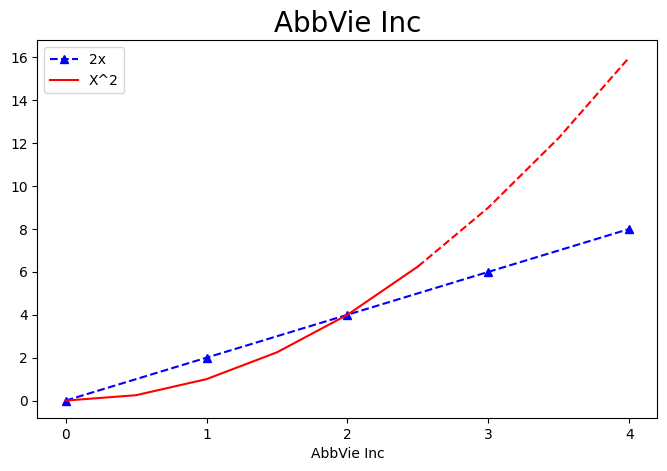

In [20]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title("AbbVie Inc", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('AbbVie Inc')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

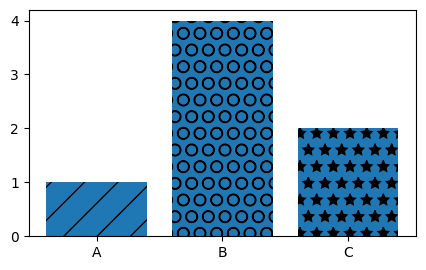

In [21]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()